In [96]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tsai.basics import *
import sklearn

In [97]:
stream = pd.read_pickle(os.path.join('..','data','processed','stream_processed.pkl'),compression= 'zip')
meteo = pd.read_pickle(os.path.join('..','data','processed','meteo_processed.pkl'),compression = 'zip')
stream

measurement_location,Datum,15202300,15205501,15207507,15210206,15212008,15212700,15213500,15214003,15214604,15216009,15217908,15221009,15228008,15241006,15242304,15243001,15246000,15247002,15247501
0,2014-01-01,14.4,17.2,19.8,3.87,8.66,9.66,0.433,2.35,0.207,1.66,0.921,0.671,2.59,0.253,0.870,1.26,2.35,0.355,0.120
1,2014-01-02,14.4,17.0,19.3,3.78,8.52,9.46,0.435,2.51,0.204,1.62,0.909,0.664,2.57,0.253,0.870,1.23,2.32,0.361,0.131
2,2014-01-03,14.1,16.6,19.3,3.78,8.40,9.42,0.429,2.61,0.201,1.60,0.907,0.641,2.58,0.253,0.871,1.23,2.30,0.362,0.130
3,2014-01-04,14.2,16.6,19.3,3.84,8.57,9.50,0.445,2.49,0.214,1.64,0.935,0.642,2.60,0.256,0.929,1.26,2.44,0.382,0.127
4,2014-01-05,16.4,18.4,20.6,4.36,9.94,10.80,0.545,2.86,0.267,1.80,1.130,0.690,3.10,0.300,1.150,1.61,3.14,0.561,0.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2023-12-28,79.7,102.0,120.0,28.50,46.20,57.10,1.900,17.30,0.721,10.30,6.070,3.920,12.20,0.786,3.270,9.05,12.50,2.020,0.741
3649,2023-12-29,71.4,82.5,97.7,26.00,41.90,51.30,1.710,15.60,0.801,9.85,5.480,3.470,10.90,0.653,2.890,7.23,9.97,1.750,0.619
3650,2023-12-30,64.0,71.4,86.3,24.40,38.60,46.90,1.530,14.70,0.835,9.40,4.900,3.100,9.77,0.557,2.550,5.92,8.54,1.470,0.514
3651,2023-12-31,59.1,63.0,77.3,22.20,35.30,42.50,1.410,13.10,0.669,8.83,4.480,2.670,8.92,0.492,2.330,5.40,7.66,1.290,0.458


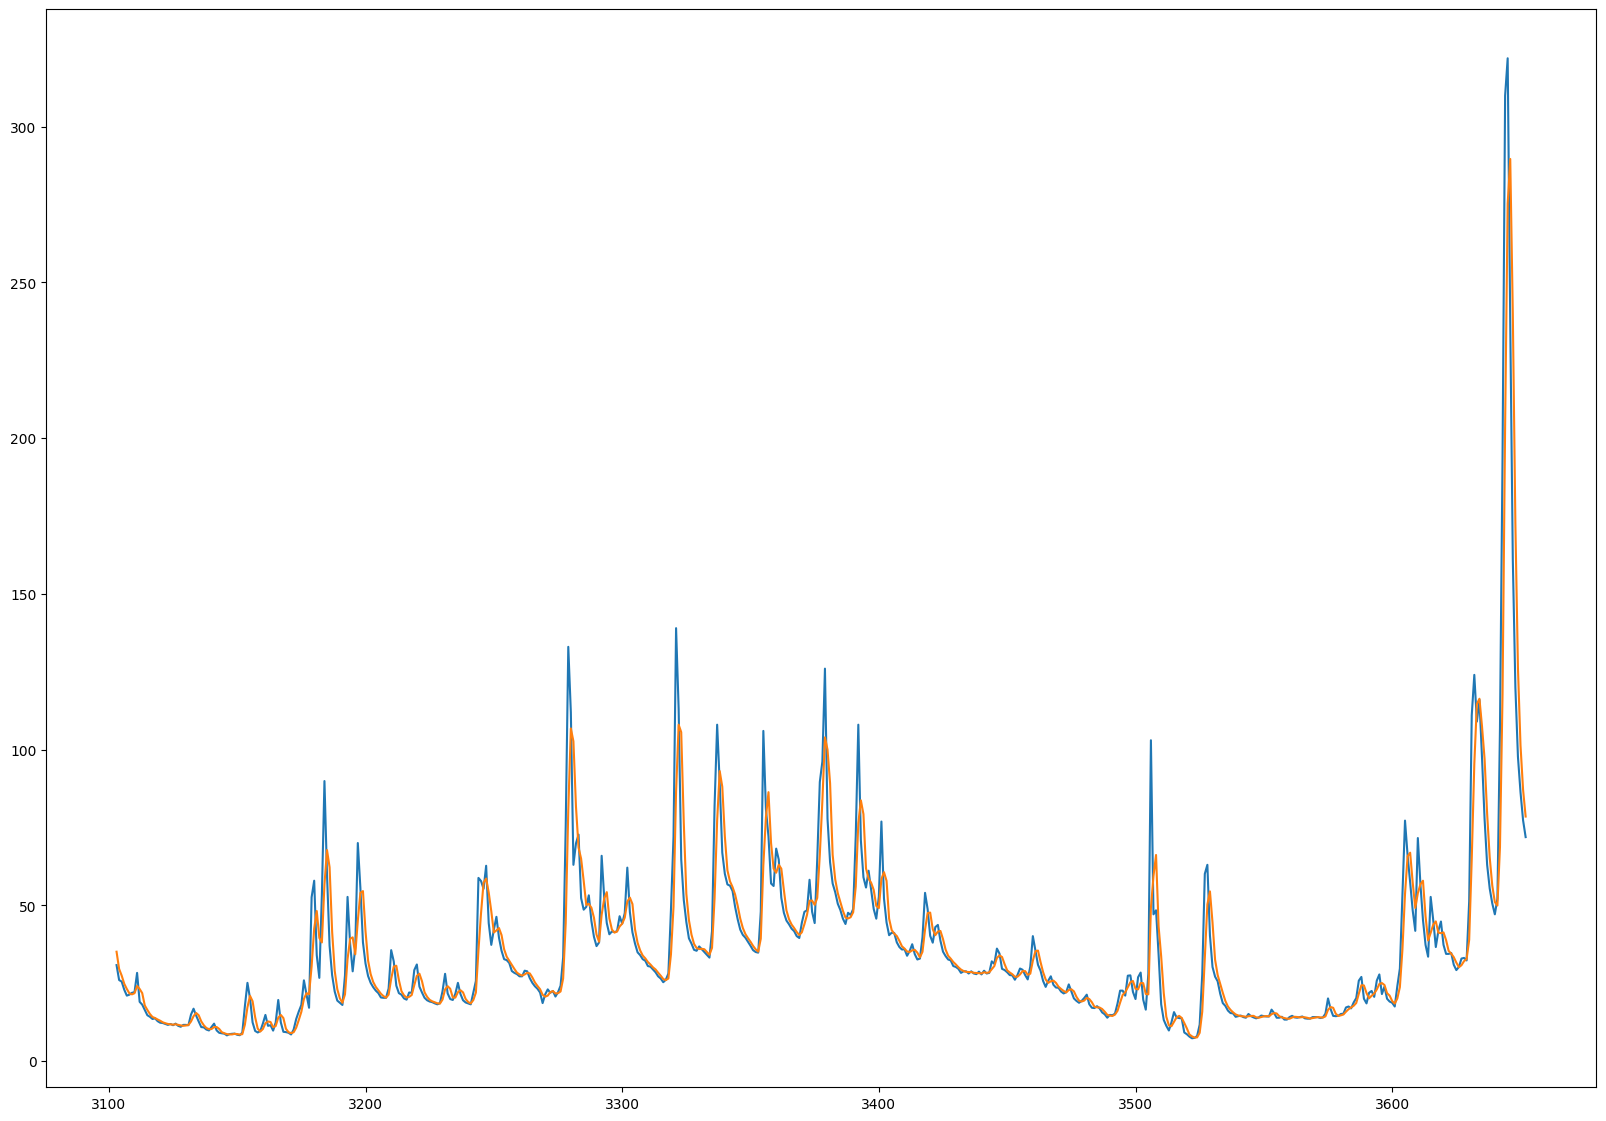

In [98]:
stream['15207507_smooth'] = stream['15207507'].rolling(window=3).mean()

plt.figure(figsize=(20, 14))

plt.plot(stream['15207507'].iloc[-550:])
plt.plot(stream['15207507_smooth'].iloc[-550:])

In [99]:
stream = stream.iloc[:3652]
meteo = meteo.drop(columns = 'date')
df = stream.join(meteo).dropna().reset_index(drop = True)
df

,Datum,15202300,15205501,15207507,15210206,15212008,15212700,15213500,15214003,15214604,...,tp_8430,tp_8500,tp_8600,tp_8711,tp_8712,tp_8720,tp_8731,tp_8732,tp_8800,tp_8900
0,2014-01-03,14.1,16.6,19.3,3.78,8.40,9.42,0.429,2.61,0.201,...,7.813191e-07,0.000001,9.848191e-07,0.000001,9.627160e-07,3.152130e-07,6.812810e-07,1.552123e-07,2.603002e-07,6.997454e-07
1,2014-01-04,14.2,16.6,19.3,3.84,8.57,9.50,0.445,2.49,0.214,...,1.543407e-04,0.000225,2.306176e-04,0.000231,2.262798e-04,1.507445e-04,2.086118e-04,1.238402e-04,1.149645e-04,2.004822e-04
2,2014-01-05,16.4,18.4,20.6,4.36,9.94,10.80,0.545,2.86,0.267,...,6.495372e-05,0.000100,1.084148e-04,0.000105,1.079762e-04,1.110781e-04,1.135130e-04,1.155993e-04,1.087480e-04,1.086862e-04
3,2014-01-06,18.3,21.4,24.4,4.38,10.70,11.50,0.524,2.87,0.237,...,3.097621e-05,0.000038,2.335611e-05,0.000031,2.357872e-05,8.976913e-06,1.149020e-05,2.702179e-06,1.805063e-06,9.742068e-06
4,2014-01-07,15.5,19.6,23.9,4.04,9.61,10.40,0.477,2.60,0.219,...,2.462877e-06,0.000009,1.518327e-05,0.000012,1.410753e-05,4.084133e-06,1.565296e-05,3.595743e-06,2.389897e-06,1.327128e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,2023-12-27,95.2,138.0,161.0,32.60,54.00,67.80,2.210,21.50,0.993,...,4.666478e-06,0.000008,1.199765e-05,0.000010,1.123335e-05,4.253323e-06,1.239131e-05,4.485424e-06,8.188290e-06,1.386781e-05
3646,2023-12-28,79.7,102.0,120.0,28.50,46.20,57.10,1.900,17.30,0.721,...,4.349469e-06,0.000009,7.186941e-06,0.000008,7.407126e-06,8.299928e-06,6.351444e-06,6.934943e-06,4.598457e-06,5.399495e-06
3647,2023-12-29,71.4,82.5,97.7,26.00,41.90,51.30,1.710,15.60,0.801,...,2.433315e-05,0.000045,4.738118e-05,0.000046,4.672316e-05,4.066719e-05,4.754517e-05,4.259339e-05,4.157456e-05,4.536385e-05
3648,2023-12-30,64.0,71.4,86.3,24.40,38.60,46.90,1.530,14.70,0.835,...,2.499465e-05,0.000021,3.040644e-05,0.000025,2.828757e-05,8.883224e-06,3.148722e-05,9.169190e-06,2.475477e-05,3.975524e-05


In [100]:
df['Datum'] = pd.to_datetime(df['Datum'])

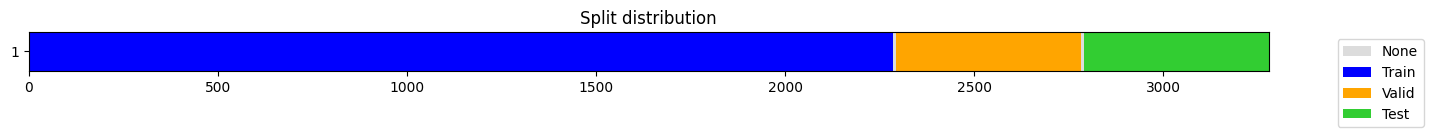

In [101]:
fcst_history = 364 # # steps in the past
fcst_horizon = 9  # # steps in the future
valid_size   = 0.15  # int or float indicating the size of the training set
test_size    = 0.15  # int or float indicating the size of the test set

splits = get_forecasting_splits(df, fcst_history=fcst_history, fcst_horizon=fcst_horizon, datetime_col='Datum',
                                valid_size=valid_size, test_size=test_size)

In [102]:
df_uni = df.drop(columns = df.columns[:20].values.tolist())
train_split = splits[0]

# pipeline
exp_pipe = sklearn.pipeline.Pipeline([
    ('scaler', TSStandardScaler(columns=df_uni.columns[20:])), # standardize data using train_split
    ], 
    verbose=True)

df_scaled = exp_pipe.fit_transform(df_uni, scaler__idxs=train_split)
df_scaled.columns

[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s


Index(['15207507_smooth', 'd2m_8110', 'd2m_8120', 'd2m_8200', 'd2m_8310',
       'd2m_8320', 'd2m_8330', 'd2m_8340', 'd2m_8410', 'd2m_8420', 'd2m_8430',
       'd2m_8500', 'd2m_8600', 'd2m_8711', 'd2m_8712', 'd2m_8720', 'd2m_8731',
       'd2m_8732', 'd2m_8800', 'd2m_8900', 'sp_8110', 'sp_8120', 'sp_8200',
       'sp_8310', 'sp_8320', 'sp_8330', 'sp_8340', 'sp_8410', 'sp_8420',
       'sp_8430', 'sp_8500', 'sp_8600', 'sp_8711', 'sp_8712', 'sp_8720',
       'sp_8731', 'sp_8732', 'sp_8800', 'sp_8900', 'ssr_8110', 'ssr_8120',
       'ssr_8200', 'ssr_8310', 'ssr_8320', 'ssr_8330', 'ssr_8340', 'ssr_8410',
       'ssr_8420', 'ssr_8430', 'ssr_8500', 'ssr_8600', 'ssr_8711', 'ssr_8712',
       'ssr_8720', 'ssr_8731', 'ssr_8732', 'ssr_8800', 'ssr_8900', 't2m_8110',
       't2m_8120', 't2m_8200', 't2m_8310', 't2m_8320', 't2m_8330', 't2m_8340',
       't2m_8410', 't2m_8420', 't2m_8430', 't2m_8500', 't2m_8600', 't2m_8711',
       't2m_8712', 't2m_8720', 't2m_8731', 't2m_8732', 't2m_8800', 't2m_8900

In [103]:
x_vars = df_scaled.columns[1:]
y_vars = df_scaled.columns[1:]

In [104]:
X,y = prepare_forecasting_data(df_scaled, fcst_history=fcst_history,fcst_horizon=fcst_horizon,x_vars=x_vars,y_vars=y_vars)
X.shape, y.shape

((3278, 95, 364), (3278, 95, 9))

In [115]:
arch_config = dict(
    n_layers=3,  # number of encoder layers
    n_heads=4,  # number of heads
    d_model=16,  # dimension of model
    d_ff=128,  # dimension of fully connected network
    attn_dropout=0.0, # dropout applied to the attention weights
    dropout=0.3,  # dropout applied to all linear layers in the encoder except q,k&v projections
    patch_len=24,  # length of the patch applied to the time series to create patches
    stride=2,  # stride used when creating patches
    padding_patch=True,  # padding_patch
)

In [116]:
learn = TSForecaster(X, y, splits=splits, batch_size=128, path="models", pipelines=[exp_pipe],
                     arch="PatchTST",device='cpu', arch_config=arch_config, metrics=[mse, mae], cbs=ShowGraph())

In [118]:
learn.summary()

not enough values to plot a chart


PatchTST (Input shape: 16 x 95 x 364)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 95 x 9         
RevIN                                     190        True      
____________________________________________________________________________
                     16 x 95 x 366       
ReplicationPad1d                                               
____________________________________________________________________________
                     16 x 24 x 172       
Unfold                                                         
____________________________________________________________________________
                     16 x 95 x 172 x 16  
Linear                                    400        True      
Dropout                                                        
Linear                                    272        True      
Linear                                    272        True      
Linear                                    272      

In [119]:
n_epochs = 100
lr_max = 0.0025
learn.fit_one_cycle(n_epochs, lr_max=lr_max)

epoch,train_loss,valid_loss,mse,mae,time


KeyboardInterrupt: 